In [404]:
import numpy as np
import matplotlib.pyplot as plt
with open("dataset") as f:
    MAX_WEIGHT = int(f.readline().strip())
    values = f.readline().strip().split()
    weights = f.readline().strip().split()

values = [int(x.replace(',', '')) for x in values]
weights = [int(x.replace(',', '')) for x in weights]

values = np.array(values)
weights = np.array(weights)
print(MAX_WEIGHT)
print(values)
print(weights)


200
[ 1 13 12 19  1  6  6 15  8  4  5 12 11 18  9  9 12 16  2  8 11  3  9 17
  2 16  2  5  3 17 11 10 13 18  2  7 13 11 10 16]
[ 7  3  5  7  9  1 18 12 12 19  1 18 12 13 16  6 17  6 15 16 10 10 10  6
 11 16 10  5  1 12  4 19  6  4 13  1 17 11  9 11]


In [405]:
solution = [0 for _ in values]

In [406]:
def fitness(solution):
    if solution == None:
        return 0
    value = np.sum([x*y for x, y in zip(solution, values)])
    return value if total_weight(solution) <= MAX_WEIGHT else 0

def total_weight(solution):
    return np.sum([x*y for x, y in zip(solution, weights)])

def maximum_weight(solution):
    w = 0
    idx = 0
    while sum < MAX_WEIGHT:
        w += weights[idx] * solution[idx]
        idx += 1
    return w

In [407]:
# Genetical algorithm

import random

# Selection tour with dimension k (3, 5, 10, 20)
def selection_tour(population, k):
    return max(random.sample(population, k), key=fitness)

def one_point_crossover(parent1, parent2):
    point = random.randint(0, len(parent1) - 1)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

def bit_flip_mutation(individual):
    point = random.randint(0, len(individual) - 1)
    individual[point] = 1 - individual[point]
    return individual



306
200
[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
[226, 241, 260, 268, 270, 277, 280, 280, 280, 294, 294, 294, 295, 297, 297, 297, 297, 297, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306]


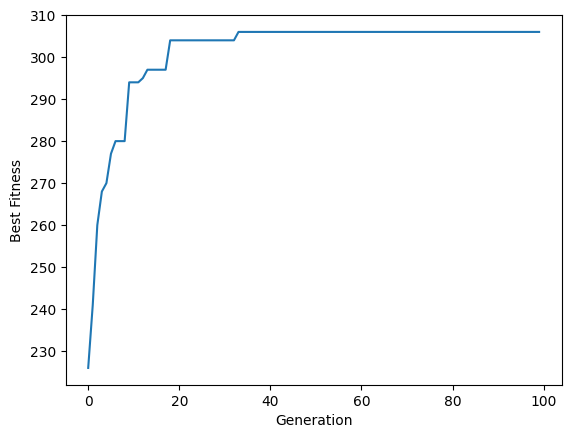

In [408]:
from copy import copy


M = 100
K_Values = [3, 5, 10, 20]
population = [[random.randint(0, 1) for _ in values] for _ in range(M)]
iteration = 100
best_solution = None
best_fitnesses = []  # list to store the best fitness of each generation
best_fitness = 0
while iteration > 0:
    iteration -= 1
    new_population = [selection_tour(population, random.choice(K_Values)) for _ in range(M // 2)]
    for _ in range(M // 4):
        parent1 = selection_tour(population, random.choice(K_Values))
        parent2 = selection_tour(population, random.choice(K_Values))
        child1, child2 = one_point_crossover(parent1, parent2)
        new_population.append(child1)
        new_population.append(child2)
    for idx in range(len(new_population)):
        if random.randint(0, 100) < 50:
            new_population[idx] = bit_flip_mutation(new_population[idx])
    for x in new_population:
        value = fitness(x)
        if value > fitness(best_solution):
            best_solution = copy(x)
            best_fitness = value
    best_fitnesses.append(best_fitness)

    population = new_population

print(fitness(best_solution))
print(total_weight(best_solution))
print(best_solution)
print(best_fitnesses)

plt.plot(best_fitnesses)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.show()